In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s [%(levelname)s] %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [2]:
# I/O
gears_df_all = pd.read_csv('gears.csv', index_col=0)
cipher_results = pd.read_csv('cipher.csv', index_col=0)
cpa_results = pd.read_csv('cpa.csv', index_col=0)
n_params = pd.read_csv('n_params.csv', index_col=0)
resource_df = pd.read_csv('agg_trace_data.csv', index_col=0)

#### GEARS complexity scaling

2025-08-01 15:59:07 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-01 15:59:07 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


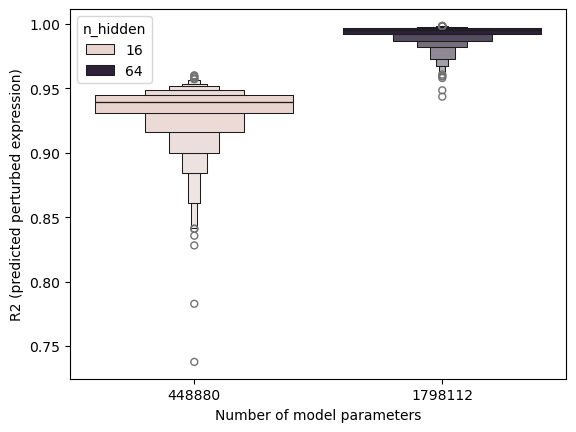

In [4]:
sns.boxenplot(gears_df_all, x='n_params', y='R2_x1', hue='n_hidden')
plt.xlabel('Number of model parameters')
plt.ylabel('R2 (predicted perturbed expression)')
plt.savefig('R2_x1_n_hidden.svg', bbox_inches='tight', dpi=300)
plt.savefig("R2_x1_n_hidden.png", bbox_inches='tight', dpi=300)

In [5]:
# Settle on the best model
gears_df = gears_df_all[gears_df_all.n_params == gears_df_all.groupby('n_params').R2_x1.mean().sort_values(ascending=False).index[0]].copy()

In [8]:
cols = ['perturbation', 'R2_real', 'R2_x1', 'mode']
pl_df = pd.concat([
    cipher_results[cols],
    gears_df[cols],
    cpa_results[cols]
], axis=0)
pl_df['Method'] = pd.Categorical(pl_df['mode'].str.upper(), categories=['GEARS', 'CPA', 'CIPHER'])

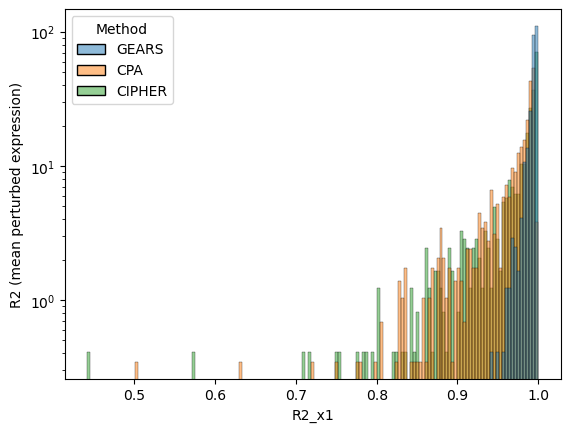

In [11]:
# Plot R2 histograms for R2 X1
plt.figure(dpi=100)
ax = sns.histplot(pl_df, x='R2_x1', hue='Method', stat='density', common_norm=False)
plt.yscale('log')
plt.ylabel('R2 (mean perturbed expression)')
plt.savefig('R2_x1.svg', bbox_inches='tight', dpi=300)
plt.savefig("R2_x1.png", bbox_inches='tight', dpi=300)

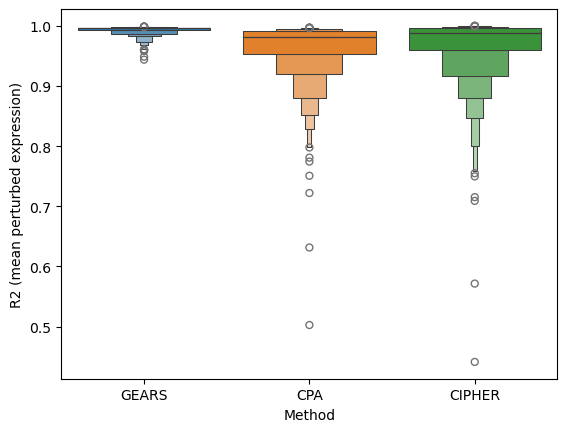

In [12]:
plt.figure()
ax = sns.boxenplot(pl_df, x='Method', y='R2_x1', hue='Method')
plt.xlabel('Method')
plt.ylabel('R2 (mean perturbed expression)')
plt.savefig('R2_x1_box.svg', bbox_inches='tight', dpi=300)
plt.savefig("R2_x1_box.png", bbox_inches='tight', dpi=300)

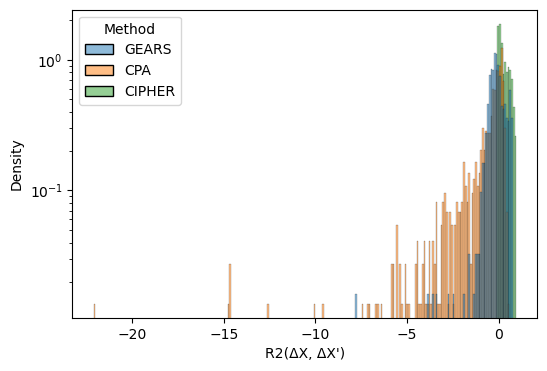

In [13]:
# Plot R2 histogram for delta X
plt.figure(dpi=100, figsize=(6,4))
ax = sns.histplot(pl_df, x='R2_real', hue='Method', stat='density', common_norm=False)
plt.yscale('log')
plt.xlabel("R2(ΔX, ΔX')")
plt.savefig("R2_deltax.svg", bbox_inches='tight', dpi=300)
plt.savefig("R2_deltax.png", bbox_inches='tight', dpi=300)

/tmp/ipykernel_602583/332418058.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shared_pos_classes = set.intersection(*pl_df[(pl_df.R2_real.astype(float)>=0)].groupby('mode', observed=True).apply(lambda x: set(x.perturbation)))


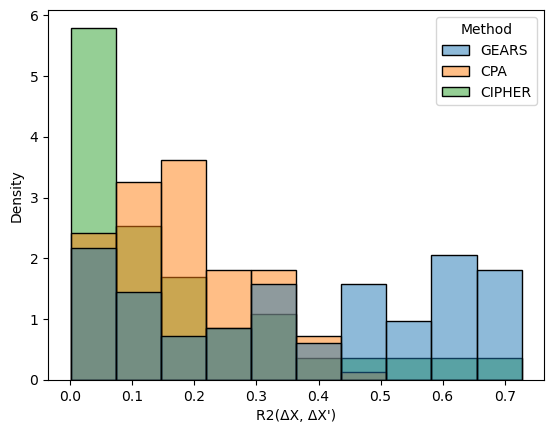

In [14]:
shared_pos_classes = set.intersection(*pl_df[(pl_df.R2_real.astype(float)>=0)].groupby('mode', observed=True).apply(lambda x: set(x.perturbation)))
ax = sns.histplot(pl_df[pl_df.perturbation.isin(shared_pos_classes)], x='R2_real', hue='Method', stat='density', common_norm=False)
#plt.yscale('log')
plt.xlabel("R2(ΔX, ΔX')")
plt.savefig("R2_deltax_pos_zoom.svg", bbox_inches='tight', dpi=300)
plt.savefig("R2_deltax_pos_zoom.png", bbox_inches='tight', dpi=300)

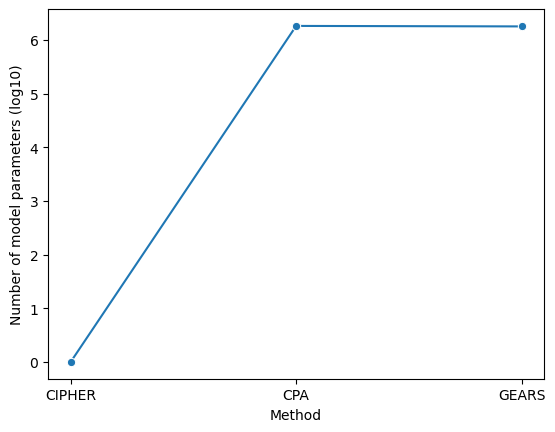

In [18]:
# Plot number of parameters
ax = sns.lineplot(n_params, x='Method', y='n_params', marker='o')
plt.ylabel('Number of model parameters (log10)')
plt.savefig('n_params.svg', bbox_inches='tight', dpi=300)
plt.savefig("n_params.png", bbox_inches='tight', dpi=300)

In [7]:
# Resource scaling
pal = ['#ffa254', '#ff7e79', '#008f00']
resource_df['Method'] = pd.Categorical(resource_df.method.tolist(), categories=['GEARS', 'CPA', 'CIPHER'])

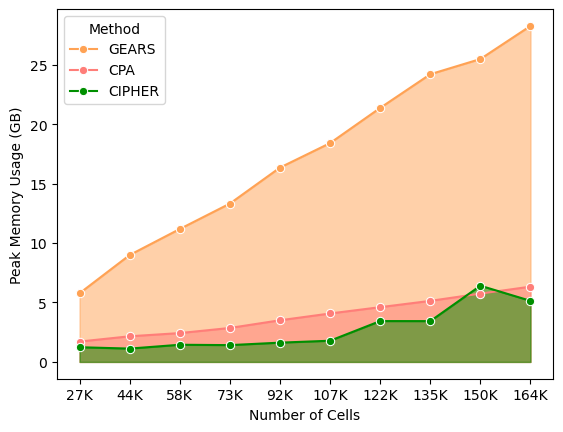

In [8]:
# Plot memory
key = 'maxmem'
plt.figure(dpi=100)
ax = sns.lineplot(resource_df, x='Number of Cells', y=key, marker='o', hue='Method', palette=pal)
for i, (method, sub) in enumerate(resource_df.groupby('Method', observed=True)):
    ax.fill_between(sub['Number of Cells'], sub[key], 0, alpha=0.5, color=pal[i])
plt.ylabel('Peak Memory Usage (GB)')
plt.savefig('mem.svg', bbox_inches='tight', dpi=300)
plt.savefig("mem.png", bbox_inches='tight', dpi=300)

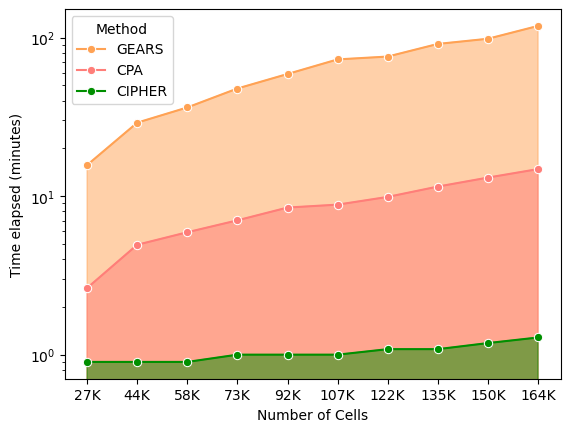

In [10]:
key = 'maxtime'
plt.figure(dpi=100)
ax = sns.lineplot(resource_df, x='Number of Cells', y=key, marker='o', hue='Method', palette=pal)
for i, (method, sub) in enumerate(resource_df.groupby('Method', observed=True)):
    ax.fill_between(sub['Number of Cells'], sub[key], 0, alpha=0.5, color=pal[i])
plt.ylabel('Time elapsed (minutes)')
plt.yscale('log')
plt.savefig('time.svg', bbox_inches='tight', dpi=300)
plt.savefig("time.png", bbox_inches='tight', dpi=300)